In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
for line in data['DESCR'].split('\n'):
    print( line )

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
X = pd.DataFrame( data['data'] )
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
Y = pd.Series( data['target'] )
Y

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

In [7]:
Ydummy = pd.get_dummies( Y )
Ydummy.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


# 1ая модель

### Параметр max_depth

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [18]:
# средние значения для каждого варианта параметра
means = []

# стандартное отклонение для каждого варианта параметра
stds = []

# попробуем посчитать какое значение max_depth дает максимальную точность

for depth in range( 1, 20 ):
    scores = cross_val_score( DecisionTreeClassifier( max_depth = depth ), X, Ydummy, cv = 5, scoring = 'accuracy' )
    
    print( depth, scores.mean() )
    
    means.append( scores.mean() )
    stds.append( scores.std() )

1 0.0968229650263
2 0.138584029712
3 0.312180439492
4 0.422406375735
5 0.494254100898
6 0.666188486537
7 0.737943361188
8 0.772443515939
9 0.777462086041
10 0.788587124729
11 0.774124110183
12 0.78135097493
13 0.788577839678
14 0.788016094089
15 0.791909625503
16 0.789139585268
17 0.78637264005
18 0.788036211699
19 0.786909625503


In [13]:
max(means)

0.79303002166511916

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

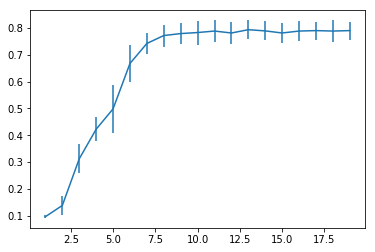

In [15]:
plt.errorbar( range( 1, 20 ), means, stds )

##### max_depth = 10 даёт максимальную точность

### Параметр min_samples_leaf

In [20]:
means = []

stds = []

for msl in range( 1, 20 ):
    scores = cross_val_score( DecisionTreeClassifier( min_samples_leaf = msl ), X, Ydummy, cv = 5, scoring = 'accuracy' )
    
    print( msl, scores.mean() )
    
    means.append( scores.mean() )
    stds.append( scores.std() )

1 0.787476013618
2 0.76243268338
3 0.759096255029
4 0.728484989167
5 0.74017641597
6 0.73459455277
7 0.741268956979
8 0.719562055091
9 0.717892293408
10 0.710086660477
11 0.707327452801
12 0.704538842464
13 0.704549675023
14 0.701762612194
15 0.696751779635
16 0.701217889198
17 0.707352212937
18 0.699020427112
19 0.704588362736


In [21]:
max(means)

0.78747601361807495

##### min_samples_leaf = 1 даёт максимальную точность

### Параметры min_samples_leaf = 1,  max_depth = 10

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Ydummy, test_size = 0.3, random_state = 0 )

In [25]:
depth = 10
msl = 1

In [51]:
score = cross_val_score( DecisionTreeClassifier( max_depth = depth, min_samples_leaf = msl ), X, Ydummy, cv = 5, scoring = 'accuracy' )

In [53]:
mean(score)

0.78523986381925104

In [30]:
dtc = DecisionTreeClassifier( max_depth = depth, min_samples_leaf = msl ).fit( X_train, Y_train )

In [43]:
model1 = dtc.predict( X_test )

In [49]:
model1

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [33]:
Y_test

,0,1,2,3,4,5,6,7,8,9
1081,0,0,1,0,0,0,0,0,0,0
1707,0,0,0,0,0,0,0,0,1,0
927,0,0,1,0,0,0,0,0,0,0
713,0,0,0,0,0,0,1,0,0,0
262,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0,0,0,0,1,0,0
303,0,1,0,0,0,0,0,0,0,0
895,0,0,0,0,0,0,0,0,0,1
933,0,0,0,0,0,0,0,0,1,0
1266,0,0,0,0,0,1,0,0,0,0


# 2ая модель

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier().fit( X_train, Y_train )

In [35]:
means = []

stds = []

for nn in range( 1, 20 ):
    scores = cross_val_score( KNeighborsClassifier(n_neighbors = nn), X, Ydummy, cv = 5, scoring = 'accuracy' )
    
    print( nn, scores.mean() )
    
    means.append( scores.mean() )
    stds.append( scores.std() )

1 0.964950479728
2 0.945485917673
3 0.9638362736
4 0.947147941814
5 0.959382544104
6 0.949924172083
7 0.955490560198
8 0.944924172083
9 0.952158774373
10 0.943811513463
11 0.948260600433
12 0.941584648716
13 0.946592386258
14 0.938246672857
15 0.942698854844
16 0.935462705045
17 0.939914887032
18 0.932683379759
19 0.935462705045


In [36]:
max(means)

0.96495047972763837

##### Выберем n_neighbors = 3

In [38]:
knc = KNeighborsClassifier(n_neighbors = 3).fit( X_train, Y_train )

In [42]:
model2 = knc.predict( X_test )

In [54]:
Y_test.head()

,0,1,2,3,4,5,6,7,8,9
1081,0,0,1,0,0,0,0,0,0,0
1707,0,0,0,0,0,0,0,0,1,0
927,0,0,1,0,0,0,0,0,0,0
713,0,0,0,0,0,0,1,0,0,0
262,0,0,0,0,0,0,1,0,0,0


In [55]:
score = cross_val_score( KNeighborsClassifier(n_neighbors = 3), X, Ydummy, cv = 5, scoring = 'accuracy' )

In [56]:
mean(score)

0.96383627359950474

# У второй модели лучше показатель метрики accuracy, чем у первой